In [965]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from chart_studio.plotly import plot,iplot
import cufflinks as cv

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [816]:
pip install plotly cufflinks

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [1075]:
import os

# List all files in the Kaggle input directory
directory_path = '/kaggle/input'
files = os.listdir(directory_path)
print("Files in the input directory:", files)

# List all files in the subdirectory if there are multiple levels
subdirectory_path = os.path.join(directory_path, 'data-train-xlsx')
sub_files = os.listdir(subdirectory_path)
print("Files in the subdirectory:", sub_files)


Files in the input directory: ['test-data', 'data-train-xlsx']
Files in the subdirectory: ['Data_Train.xlsx']


In [1076]:
import os
import pandas as pd

# Define the directory and file path
directory_path = '/kaggle/input/data-train-xlsx'
file_path = os.path.join(directory_path, 'Data_Train.xlsx')

# Read the Excel file into a DataFrame
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(data.head())


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [1077]:
data=pd.DataFrame(data)

In [1078]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Automated EDA

In [917]:
# pip install pandas-profiling

In [918]:
# !pip install -U pandas-profiling


In [919]:
# !pip install pydantic-settings


In [920]:
# !pip install -U pandas-profiling


In [921]:
# !pip install git+https://github.com/pandas-profiling/pandas-profiling.git


In [922]:
import ydata_profiling as pf

In [ ]:
pf.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

# Manual EDA

In [1079]:
data.shape

(10683, 11)

In [1080]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [1081]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [1082]:
data.dropna(how='any',inplace=True)

In [1083]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

In [1084]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Day_of_Journey'] = data['Date_of_Journey'].dt.day
data['Month_of_Journey'] = data['Date_of_Journey'].dt.month

In [1085]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


In [1086]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [1087]:
data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


In [1088]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Dep_Hours']=(data['Dep_Time']).dt.hour
data['Dep_Minutes']=(data['Dep_Time']).dt.minute

In [1089]:
data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-05-28 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-28 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-28 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25


In [1090]:
data.drop(['Dep_Time'],axis=1,inplace=True)

In [1091]:
data.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25


In [1092]:
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data['Arrival_Hours']=(data['Arrival_Time']).dt.hour
data['Arrival_Minutes']=(data['Arrival_Time']).dt.minute
data['Arrival_Month']=(data['Arrival_Time']).dt.month

In [1093]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Arrival_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25,4,25,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-05-28 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-05-28 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,5


In [1094]:
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [1095]:
data.drop(['Arrival_Month'],axis=1,inplace=True)

In [1096]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


In [1097]:
duration=data['Duration'].str.split(' ',expand=True) #split duration on basis of space
duration[1].fillna('00m',inplace=True)
data['duration_hour']=duration[0].apply(lambda x: x[:-1])
data['duration_minutes']=duration[1].apply(lambda x: x[:-1])

In [1098]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,duration_hour,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [1099]:
data.drop(['Duration'],axis=1,inplace=True)

In [1100]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,duration_hour,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [1101]:
# import cufflinks as cf

# # Set configuration options
# cf.go_offline(connected=True)

# # Example plot using Cufflinks
# data = cf.datagen.lines()
# data.iplot(kind='scatter', mode='lines+markers', theme='ggplot', filename='cufflinks-line-chart')


In [1102]:
print(data.columns)


Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hours', 'Dep_Minutes', 'Arrival_Hours', 'Arrival_Minutes',
       'duration_hour', 'duration_minutes'],
      dtype='object')


In [1103]:
data['Airline'].value_counts()


Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

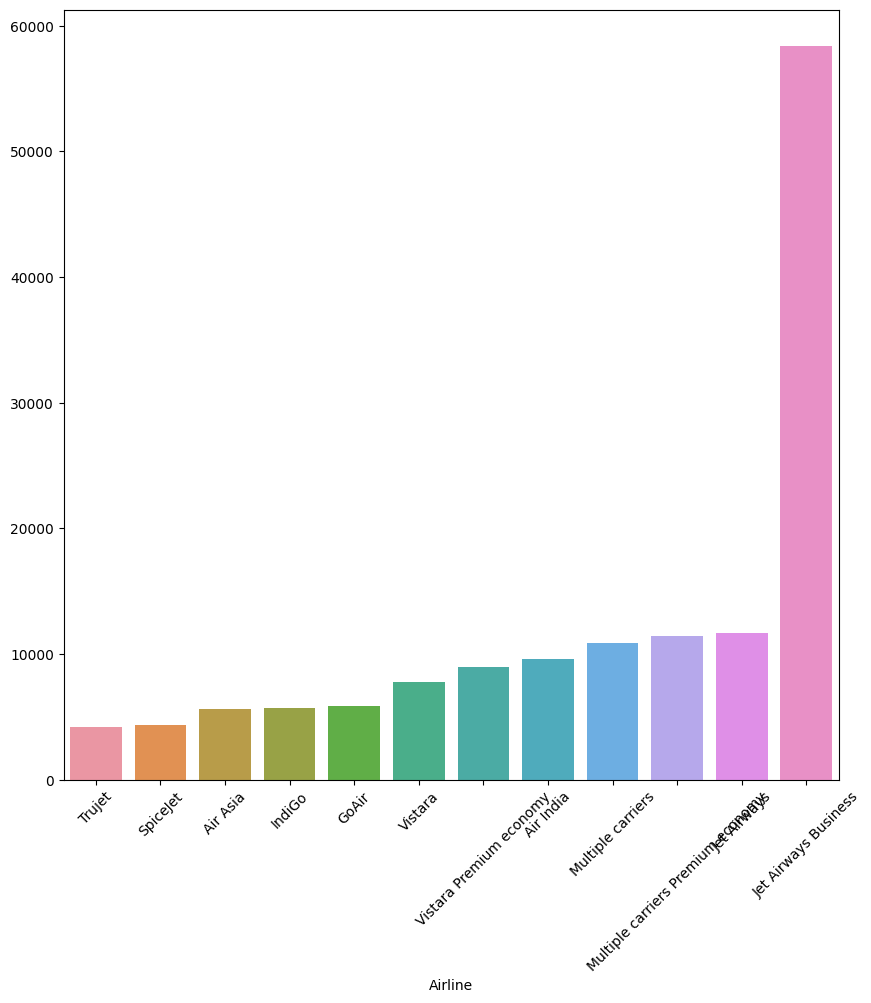

In [1104]:
Airprices = data.groupby('Airline')['Price'].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 10))
sns.barplot(x=Airprices.index, y=Airprices.values)
plt.xticks(rotation=45)
plt.show()

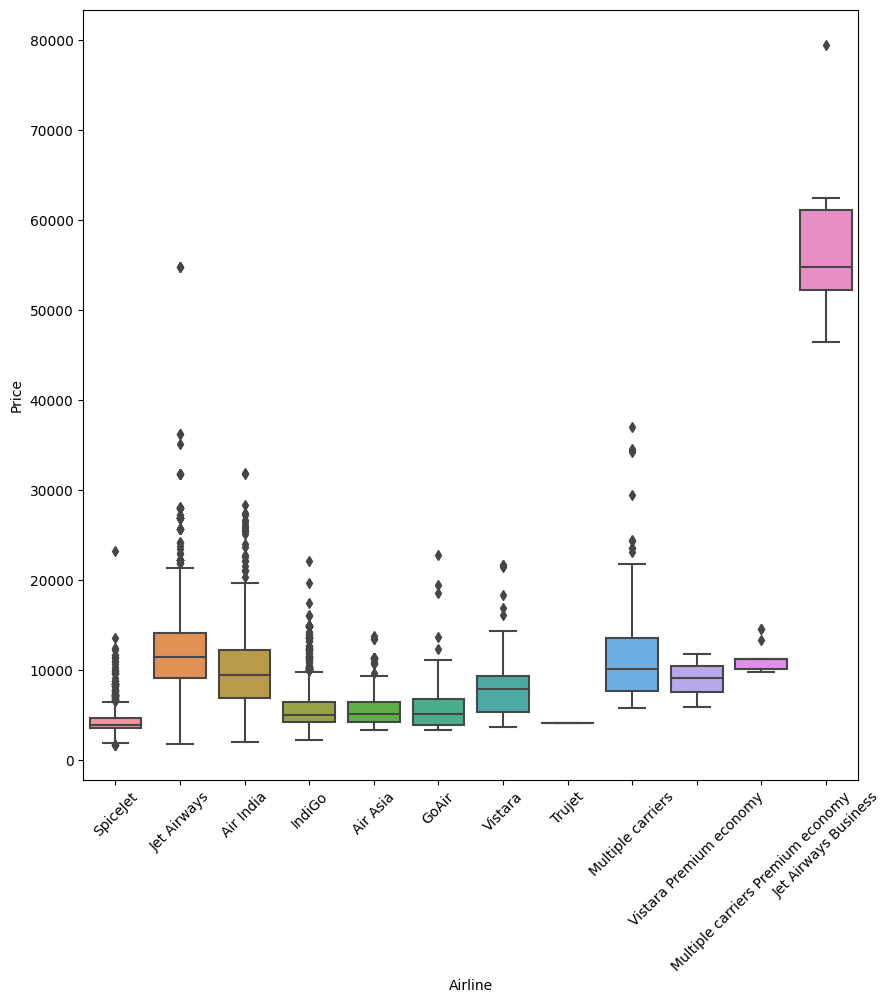

In [1105]:
# Airprices = data.groupby('Airline')['Price'].mean().sort_values(ascending=False)

# Setting up the figure size
plt.figure(figsize=(10, 10))

# Creating the box plot
sns.boxplot(x='Airline', y='Price',data=data.sort_values('Price',ascending=True))

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

# Price Based on number of stops

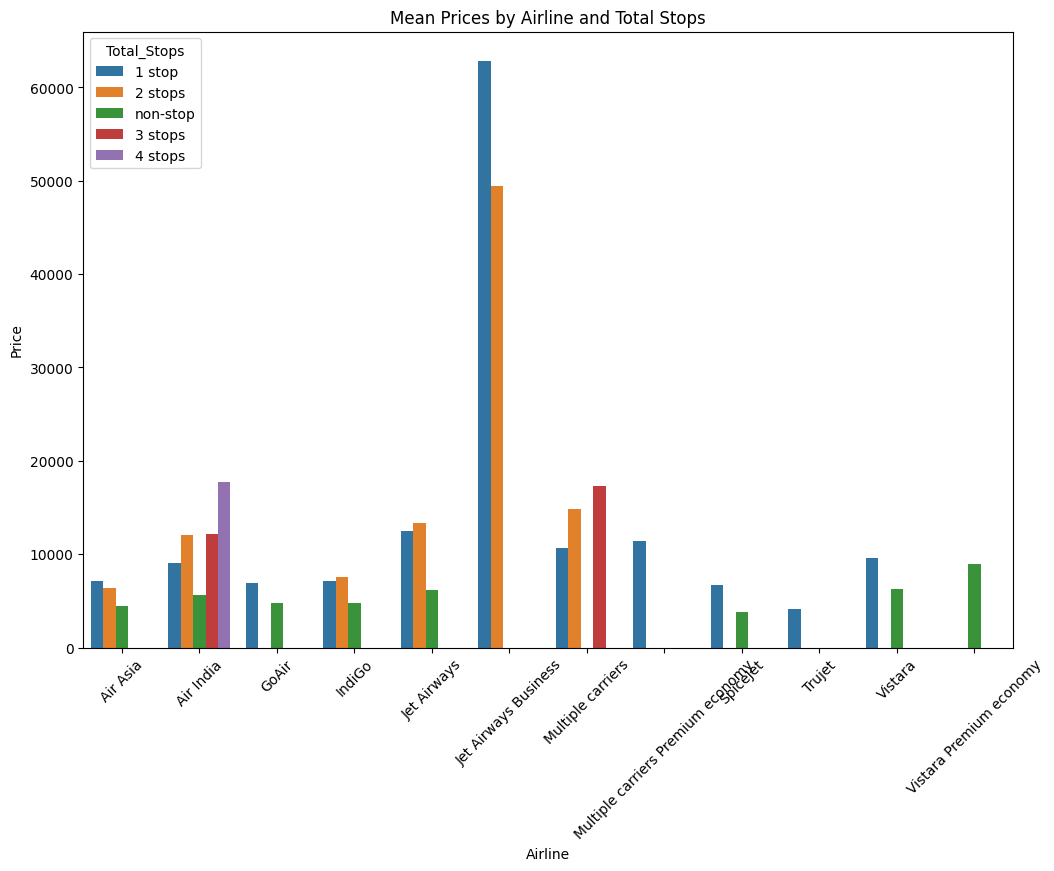

In [1106]:
mean_prices = data.groupby(['Airline', 'Total_Stops'])['Price'].mean().reset_index()

# Setting up the figure size
plt.figure(figsize=(12, 8))

# Creating the bar plot
sns.barplot(x='Airline', y='Price', hue='Total_Stops', data=mean_prices)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a title
plt.title('Mean Prices by Airline and Total Stops')

# Displaying the plot
plt.show()

In [1107]:
data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

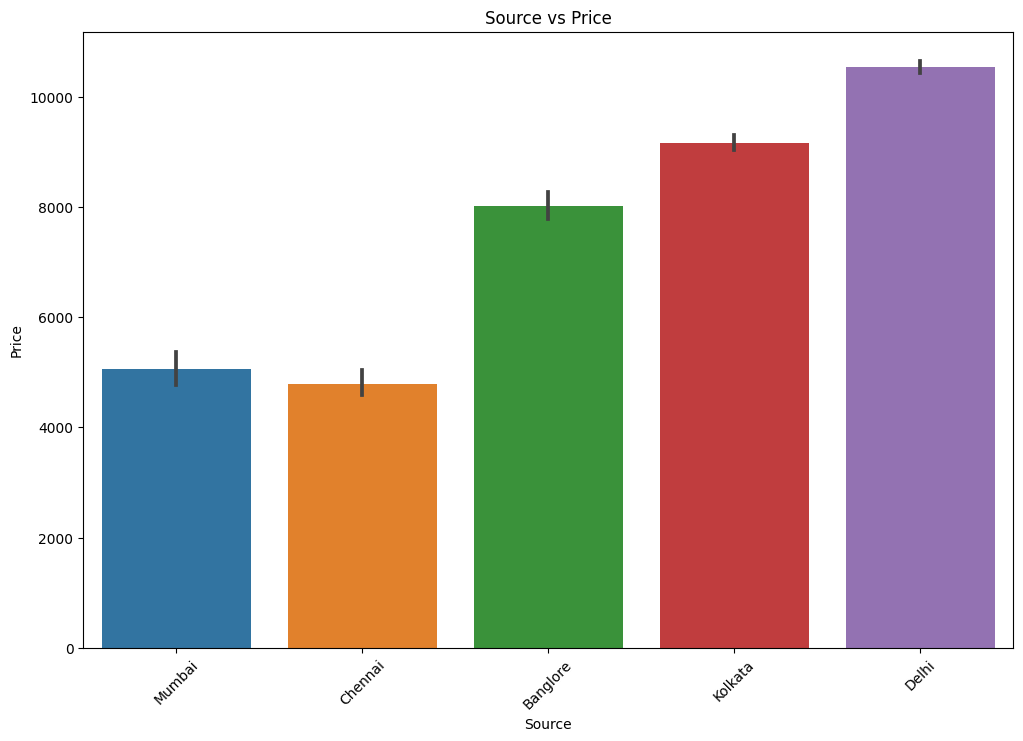

In [1108]:
# # data.groupby(['Airline','Source'])['Price'].mean()
# mean_prices = data.groupby(['Airline', 'Source'])['Price'].mean().reset_index()

# Setting up the figure size
plt.figure(figsize=(12, 8))

# Creating the bar plot
sns.barplot(x='Source', y='Price', data=data.sort_values('Price',ascending=True))

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a title
plt.title('Source vs Price')

# Displaying the plot
plt.show()

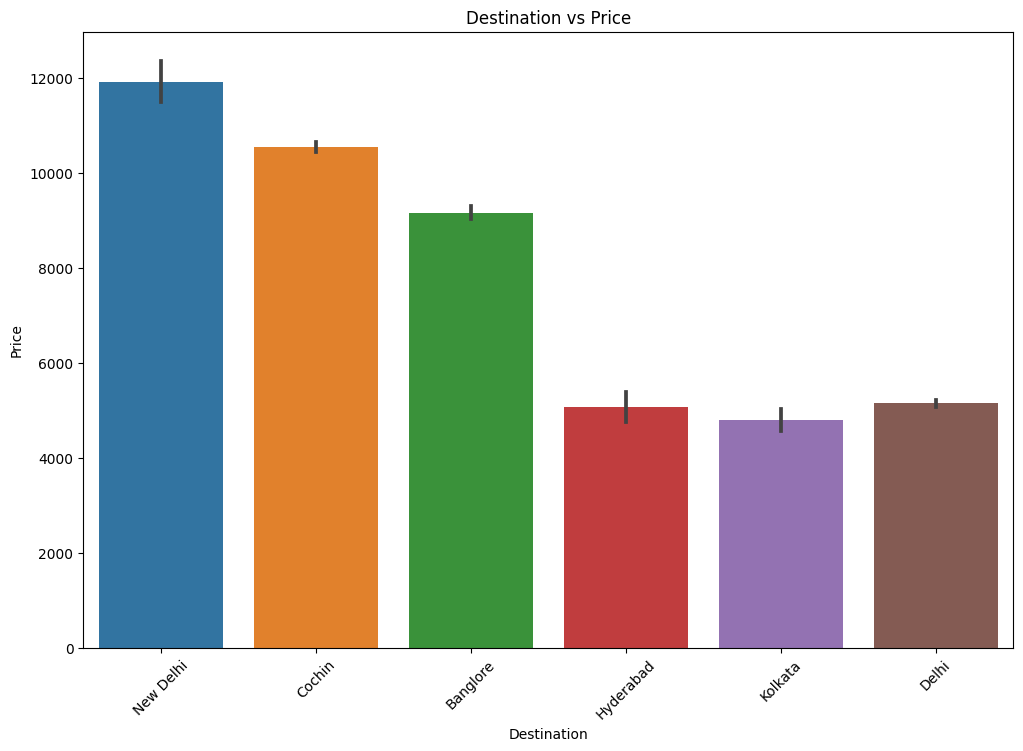

In [1109]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Destination', y='Price', data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=45)
plt.title('Destination vs Price')
plt.show()

In [1110]:
data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [1111]:
data['Destination'] = data['Destination'].replace({'New Delhi': 'Delhi'})

In [1112]:
data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [1113]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [1114]:
# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data)

# Compute correlation
correlation_matrix = data_encoded.corr()
correlation_matrix

,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,duration_minutes_15,duration_minutes_20,duration_minutes_25,duration_minutes_30,duration_minutes_35,duration_minutes_40,duration_minutes_45,duration_minutes_5,duration_minutes_50,duration_minutes_55
Price,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,-0.133050,0.050432,-0.095151,...,-0.001986,0.019966,0.020222,-0.091609,-0.025187,0.031818,-0.004310,0.082465,-0.098553,-0.018073
Day_of_Journey,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,0.008926,-0.032490,-0.003122,...,0.002433,0.006317,-0.014689,0.017810,0.009513,-0.005075,-0.015857,-0.012916,0.002195,-0.007999
Month_of_Journey,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.005652,-0.045981,-0.004494,...,-0.008625,0.004574,-0.016462,0.048271,-0.019976,-0.040315,-0.018819,-0.021766,-0.032355,0.013593
Dep_Hours,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.045960,-0.012879,-0.016373,...,-0.034151,0.031767,-0.068760,0.026228,0.042096,-0.010343,-0.033424,0.048511,-0.003186,-0.012998
Dep_Minutes,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,0.158211,-0.045688,0.076751,...,-0.120259,0.044395,-0.044755,0.049344,0.030031,0.085812,0.016182,0.059238,0.001287,0.014162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
duration_minutes_40,0.031818,-0.005075,-0.040315,-0.010343,0.085812,-0.048570,0.053012,0.009313,-0.000271,-0.025333,...,-0.076459,-0.080729,-0.071735,-0.099558,-0.078112,1.000000,-0.076135,-0.062618,-0.079608,-0.076782
duration_minutes_45,-0.004310,-0.015857,-0.018819,-0.033424,0.016182,-0.033425,0.100401,0.012386,0.044815,0.022072,...,-0.091949,-0.097084,-0.086269,-0.119727,-0.093937,-0.076135,1.000000,-0.075304,-0.095736,-0.092338
duration_minutes_5,0.082465,-0.012916,-0.021766,0.048511,0.059238,0.038290,-0.050272,-0.043664,0.030081,-0.030856,...,-0.075625,-0.079848,-0.070953,-0.098471,-0.077260,-0.062618,-0.075304,1.000000,-0.078739,-0.075944
duration_minutes_50,-0.098553,0.002195,-0.032355,-0.003186,0.001287,-0.036181,0.058781,0.093654,-0.003808,0.013034,...,-0.096144,-0.101513,-0.090204,-0.125189,-0.098222,-0.079608,-0.095736,-0.078739,1.000000,-0.096550


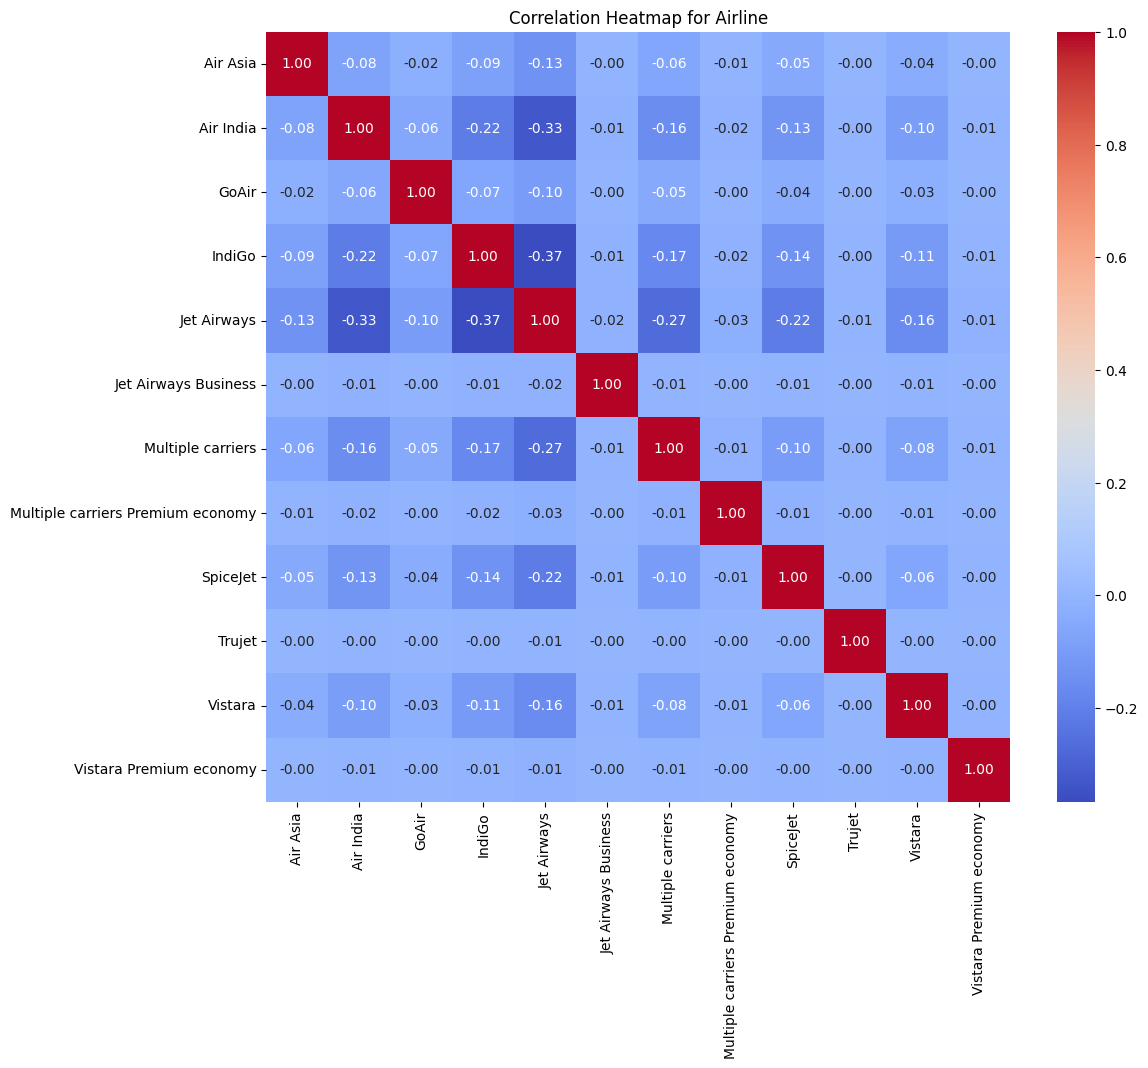

In [1115]:
airline_encoded = pd.get_dummies(data['Airline'])

# Compute correlation matrix
airline_correlation = airline_encoded.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(airline_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Airline')
plt.show()

# Apply Onehot Encoding on categorical variables

In [1116]:
from sklearn.preprocessing import OneHotEncoder

# Convert 'Total_Stops' using map function
data['Total_Stops'] = data['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Encode 'Airline', 'Source', and 'Destination' columns
encoded_cols = encoder.fit_transform(data[['Airline', 'Source', 'Destination']])

# Create DataFrame from encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Airline', 'Source', 'Destination']))

# Convert encoded values to integers
encoded_df = encoded_df.astype(int)

# Concatenate the encoded DataFrame with the original data
data_1 = pd.concat([encoded_df, data], axis=1)

# Drop the original categorical columns
data_1.drop(['Airline', 'Source', 'Destination'], inplace=True, axis=1)


In [1117]:
data_1.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,duration_hour,duration_minutes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2,50
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7,25
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,No info,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19,00
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5,25
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4,45


In [1118]:
data_1.shape

(10683, 34)

In [1147]:
data_1.isnull()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,duration_hour,duration_minutes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1149]:
data_1.dropna(how='any',inplace=True)

In [1150]:
data_1.isnull().sum()

Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Banglore                              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Banglore                         0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_K

In [1153]:
import os

# List all files in the Kaggle input directory
directory_path = '/kaggle/input'
files = os.listdir(directory_path)
print("Files in the input directory:", files)

# List all files in the subdirectory if there are multiple levels
subdirectory_path = os.path.join(directory_path, 'data-train-xlsx')
sub_files = os.listdir(subdirectory_path)
print("Files in the subdirectory:", sub_files)


Files in the input directory: ['test-data', 'data-train-xlsx']
Files in the subdirectory: ['Data_Train.xlsx']


In [1154]:
import os
import pandas as pd

# Define the directory and file path
directory_path = '/kaggle/input/test-data'
file_path = os.path.join(directory_path, 'Test_set.xlsx')

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())


             Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info  


In [1155]:
df=pd.DataFrame(df)

In [1156]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [1157]:
df.shape

(2671, 10)

In [1158]:
import pandas as pd

# Assuming 'df' is your DataFrame
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month


In [1159]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [1160]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [1161]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Dep_Hours']=(df['Dep_Time']).dt.hour
df['Dep_Minutes']=(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis=1,inplace=True)

In [1162]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20


In [1163]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hours']=(df['Arrival_Time']).dt.hour
df['Arrival_Minutes']=(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [1164]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20


In [1165]:
duration=df['Duration'].str.split(' ',expand=True) #split duration on basis of space
duration[1].fillna('00m',inplace=True)
df['duration_hour']=duration[0].apply(lambda x: x[:-1])
df['duration_minutes']=duration[1].apply(lambda x: x[:-1])
df.drop(['Duration'],axis=1,inplace=True)

In [1166]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,duration_hour,duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,00


In [1167]:
from sklearn.preprocessing import OneHotEncoder

# Convert 'Total_Stops' using map function
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Encode 'Airline', 'Source', and 'Destination' columns
encoded_cols = encoder.fit_transform(df[['Airline', 'Source', 'Destination']])

# Create DataFrame from encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Airline', 'Source', 'Destination']))

# Convert encoded values to integers
encoded_df = encoded_df.astype(int)

# Concatenate the encoded DataFrame with the original data
df = pd.concat([encoded_df, data], axis=1)

# Drop the original categorical columns
df.drop(['Airline', 'Source', 'Destination','Additional_Info','Route'], inplace=True, axis=1)


In [1168]:
df.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,duration_hour,duration_minutes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3897,24,3,22,20,1,10,2,50
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,7662,1,5,5,50,13,15,7,25
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,13882,9,6,9,25,4,25,19,00
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,6218,12,5,18,5,23,30,5,25
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,13302,1,3,16,50,21,35,4,45


In [1169]:
data_1.shape

(10681, 34)

In [1170]:
df.shape

(10682, 32)

In [1171]:
data_1.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,duration_hour,duration_minutes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2,50
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7,25
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,No info,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19,00
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5,25
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4,45


In [1172]:
x=data_1.drop(['Route','Price','Additional_Info'],axis=1)
y=data_1['Price']

In [1173]:
x.isnull().sum()

Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Banglore                              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Banglore                         0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_K

In [1180]:
y.isnull().sum()

0

# Model Building

In [1175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [1176]:
from sklearn.ensemble import ExtraTreesRegressor
ET_model=ExtraTreesRegressor(n_estimators=120)
ET_model.fit(x_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [1178]:
ET_model.score(x_train,y_train)

0.978003687774069

In [1179]:
ET_model.score(x_test,y_test)

0.7086996017849738

In [1182]:
y_pred=ET_model.predict(x_test)

In [1184]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [1185]:
r2

0.7086996017849738

In [1186]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=120, random_state=42)
RF_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=42)

In [1187]:
y_pred=RF_model.predict(x_test)

In [1188]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)

In [1189]:
r2_score

0.7369714644526126

In [1190]:
from sklearn.model_selection import RandomizedSearchCV

In [1200]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = [1.0, 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)] + [None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, 
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)


In [1201]:
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1.0, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [1203]:
rf_pred=rf_random.predict(x_test)

In [1204]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MAE is",mean_absolute_error(y_test,rf_pred))
print("MSE is",mean_squared_error(y_test,rf_pred))

MAE is 1409.6381477812079
MSE is 5365063.355466837


In [1207]:
from sklearn.metrics import r2_score 

# Calculate R-squared score
r_squared = r2_score(y_test, rf_pred)

print("R-squared score:", r_squared)

R-squared score: 0.7517870442988055


In [1208]:
!pip install catboost

In [1209]:
from catboost import CatBoostRegressor

In [1210]:
cat=CatBoostRegressor()
cat.fit(x_train,y_train)

Learning rate set to 0.057462
0:	learn: 4465.7397757	total: 58ms	remaining: 57.9s
1:	learn: 4315.9292187	total: 61.2ms	remaining: 30.5s
2:	learn: 4178.0703880	total: 63.8ms	remaining: 21.2s
3:	learn: 4053.4786039	total: 66.4ms	remaining: 16.5s
4:	learn: 3938.2790422	total: 69.1ms	remaining: 13.7s
5:	learn: 3836.3549215	total: 71.6ms	remaining: 11.9s
6:	learn: 3731.5487414	total: 74ms	remaining: 10.5s
7:	learn: 3634.5872822	total: 76.6ms	remaining: 9.5s
8:	learn: 3549.0812853	total: 79.3ms	remaining: 8.73s
9:	learn: 3467.6656188	total: 81.7ms	remaining: 8.09s
10:	learn: 3399.3473435	total: 84.2ms	remaining: 7.57s
11:	learn: 3327.3274976	total: 88.7ms	remaining: 7.3s
12:	learn: 3262.8858148	total: 91.6ms	remaining: 6.96s
13:	learn: 3200.6167524	total: 94ms	remaining: 6.62s
14:	learn: 3144.9654390	total: 96.7ms	remaining: 6.35s
15:	learn: 3104.0195578	total: 99.3ms	remaining: 6.11s
16:	learn: 3061.4261932	total: 102ms	remaining: 5.89s
17:	learn: 3017.3930425	total: 104ms	remaining: 5.69s


In [1211]:
cat_pred=cat.predict(x_test)

In [1212]:
r2score=r2_score(y_test,cat_pred)

In [1213]:
r2score

0.7764547868299982

In [1214]:
!pip install lightgbm

In [1216]:
x_train[['duration_hour', 'duration_minutes']] = x_train[['duration_hour', 'duration_minutes']].astype(int)
x_test[['duration_hour', 'duration_minutes']] = x_test[['duration_hour', 'duration_minutes']].astype(int)


In [1217]:
from lightgbm import LGBMRegressor

lgbm_model=LGBMRegressor()
lgbm_model.fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 8544, number of used features: 27
[LightGBM] [Info] Start training from score 9074.172753


LGBMRegressor()

In [1218]:
lgbm_pred=lgbm_model.predict(x_test)

In [1219]:
lgbm_score=r2_score(y_test,lgbm_pred)

In [1220]:
lgbm_score

0.748580250373866

In [1222]:
import xgboost as xgb

xgb_model=xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1223]:
xgb_pred=xgb_model.predict(x_test)

In [1224]:
xgb_score=r2_score(y_test,xgb_pred)

In [1225]:
xgb_score

0.7579967800934564

In [1226]:
data_1.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,duration_hour,duration_minutes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2,50
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7,25
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,No info,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19,00
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5,25
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No info,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4,45


In [1227]:
data_1.columns

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_Hours', 'Dep_Minutes', 'Arrival_Hours',
       'Arrival_Minutes', 'duration_hour', 'duration_minutes'],
      dtype='object')

In [1232]:
deploy_data=data.drop(['Route','Additional_Info'],axis=1)

In [1233]:
deploy_data.to_csv('deploy_data')